# Apache benchによるESXi負荷テスト

### テストサーバーVMのアプリ実行状態を確認

In [3]:
!../scripts/servers_status.bash -C all-targets-config

Check server status on VMs...
172.16.130.201 status:
    not running
    [test address] 172.16.16.1/24
172.16.130.202 status:
    [httpd] active
    [test address] 172.16.16.2/24
172.16.130.203 status:
    [httpd] active
    [test address] 172.16.16.3/24
172.16.130.204 status:
    [httpd] active
    [test address] 172.16.16.4/24
172.16.130.205 status:
    [httpd] active
    [test address] 172.16.17.1/24
172.16.130.206 status:
    [httpd] active
    [test address] 172.16.17.2/24
172.16.130.207 status:
    [httpd] active
    [test address] 172.16.17.3/24
172.16.130.208 status:
    [httpd] active
    [test address] 172.16.17.4/24
Finished.


### DFW OFF - ホストCPU使用率 - apache bench 1セッション

[Test parameters per Client]
| Time Limit(s): 10 | Total Requests: 1000000 | Concurrency: 10 
Testing, wait until test complete...  done
[Test Result]
| Number of clients: 1
[Test Result]
| Number of hosts: 2
/root/mytesttools/tester/jupyter/reports/ab-DLS1a-ab-180616-193740/ab-DLS1a-ab-172.16.130.201.result
This is ApacheBench, Version 2.3 <$Revision: 1430300 $>
Copyright 1996 Adam Twiss, Zeus Technology Ltd, http://www.zeustech.net/
Licensed to The Apache Software Foundation, http://www.apache.org/

Benchmarking 172.16.16.2 (be patient)


Server Software:        Apache/2.4.6
Server Hostname:        172.16.16.2
Server Port:            80

Document Path:          /
Document Length:        4897 bytes

Concurrency Level:      10
Time taken for tests:   61.477 seconds
Complete requests:      1000000
Failed requests:        0
Write errors:           0
Non-2xx responses:      1000000
Total transferred:      5168000000 bytes
HTML transferred:       4897000000 bytes
Requests per second:    16

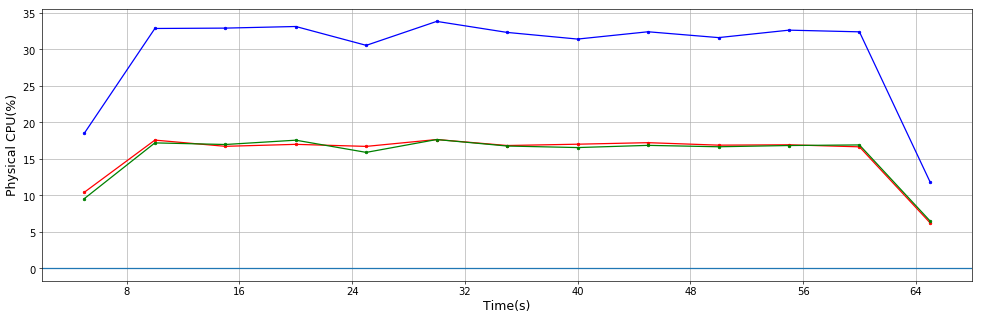

/root/mytesttools/tester/jupyter/reports/ab-DLS1a-ab-180616-193740/ab-DLS1a-esxtop-172.16.130.5.csv
Red - CPU Total Util / Blue - CPU Total Core Util / Green - CPU Total Proc Time
[ 5 10 15 20 25 30 35 40 45 50 55 60 65] [0.63 0.49 0.6  0.44 0.81 0.41 0.56 0.59 1.02 0.45 0.58 0.48 0.79] [1.13 0.89 1.14 0.97 1.53 0.76 1.04 1.1  1.96 0.8  1.23 0.87 1.53] [0.63 0.47 0.57 0.42 0.81 0.39 0.54 0.56 1.04 0.41 0.57 0.44 0.79]


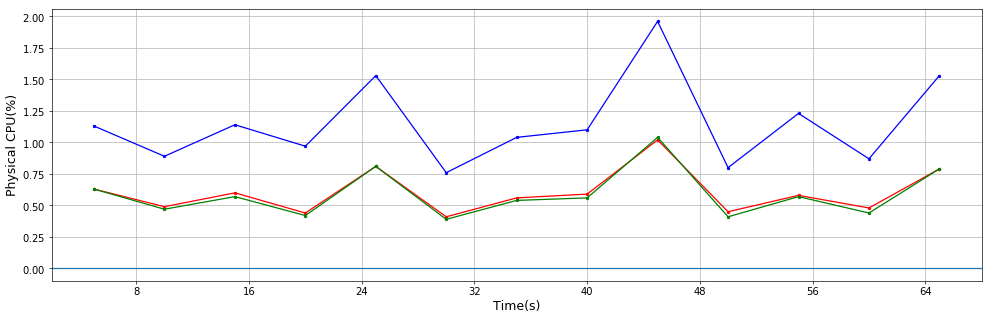

In [37]:
%run -i abench_cl.py -C DLS1a-config -N ab-DLS1a -n 1000000 -c 10 

[Test parameters per Client]
| Time Limit(s): 10 | Total Requests: 5000000 | Concurrency: 10 
Testing, wait until test complete...  done
[Test Result]
| Number of clients: 1
[Test Result]
| Number of hosts: 2

/root/mytesttools/tester/jupyter/reports/ab-DLS1-ab-180616-212704/ab-DLS1-ab-172.16.130.201.result
This is ApacheBench, Version 2.3 <$Revision: 1430300 $>
Copyright 1996 Adam Twiss, Zeus Technology Ltd, http://www.zeustech.net/
Licensed to The Apache Software Foundation, http://www.apache.org/

Benchmarking 172.16.17.1 (be patient)


Server Software:        Apache/2.4.6
Server Hostname:        172.16.17.1
Server Port:            80

Document Path:          /
Document Length:        4897 bytes

Concurrency Level:      10
Time taken for tests:   303.102 seconds
Complete requests:      5000000
Failed requests:        0
Write errors:           0
Non-2xx responses:      5000000
Total transferred:      25840000000 bytes
HTML transferred:       24485000000 bytes
Requests per second:    

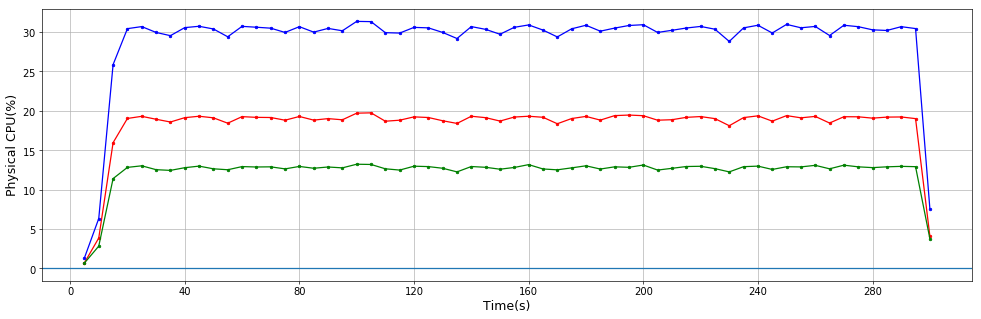

/root/mytesttools/tester/jupyter/reports/ab-DLS1-ab-180616-212704/ab-DLS1-esxtop-172.16.130.5.csv
| Red - CPU Total Util | Blue - CPU Total Core Util | Green - CPU Total Proc Time |


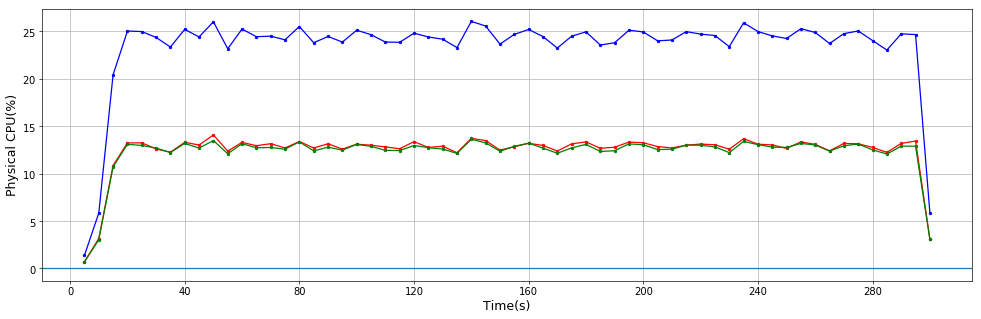

In [46]:
%run -i abench_cl.py -C DLS1-config -N ab-DLS1 -n 5000000 -c 10 

### DFW ON - ホストCPU使用率 - apache bench 1セッション

[Test parameters per Client]
| Time Limit(s): 10 | Total Requests: 1000000 | Concurrency: 10 
Testing, wait until test complete...  done
[Test Result]
| Number of clients: 1
[Test Result]
| Number of hosts: 2
/root/mytesttools/tester/jupyter/reports/ab-DLS1a-ab-180616-194549/ab-DLS1a-ab-172.16.130.201.result
This is ApacheBench, Version 2.3 <$Revision: 1430300 $>
Copyright 1996 Adam Twiss, Zeus Technology Ltd, http://www.zeustech.net/
Licensed to The Apache Software Foundation, http://www.apache.org/

Benchmarking 172.16.16.2 (be patient)


Server Software:        Apache/2.4.6
Server Hostname:        172.16.16.2
Server Port:            80

Document Path:          /
Document Length:        4897 bytes

Concurrency Level:      10
Time taken for tests:   58.940 seconds
Complete requests:      1000000
Failed requests:        0
Write errors:           0
Non-2xx responses:      1000000
Total transferred:      5168000000 bytes
HTML transferred:       4897000000 bytes
Requests per second:    16

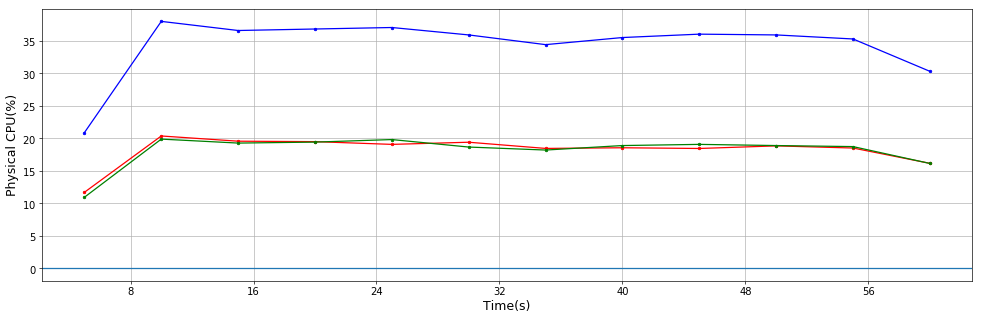

/root/mytesttools/tester/jupyter/reports/ab-DLS1a-ab-180616-194549/ab-DLS1a-esxtop-172.16.130.5.csv
Red - CPU Total Util / Blue - CPU Total Core Util / Green - CPU Total Proc Time
[ 5 10 15 20 25 30 35 40 45 50 55 60] [0.44 0.55 0.58 0.79 0.5  0.54 0.53 0.91 0.43 1.22 0.64 0.55] [0.87 1.07 1.05 1.53 0.93 1.02 0.96 1.88 0.79 2.35 1.23 1.02] [0.4  0.52 0.53 0.81 0.48 0.52 0.52 0.92 0.4  1.15 0.63 0.53]


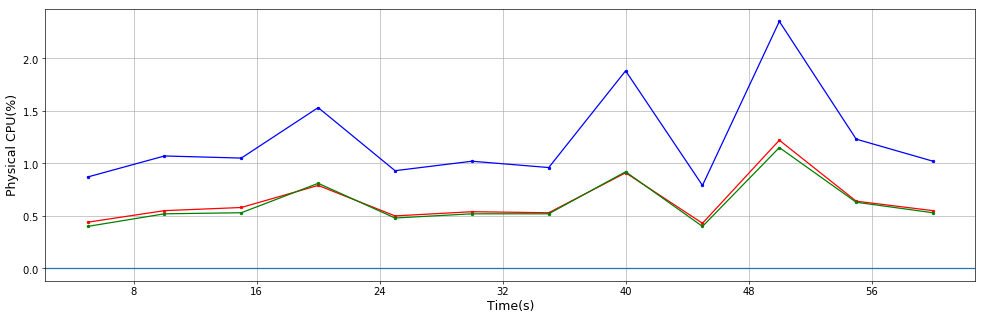

In [39]:
%run -i abench_cl.py -C DLS1a-config -N ab-DLS1a -n 1000000 -c 10 

[Test parameters per Client]
| Time Limit(s): 10 | Total Requests: 5000000 | Concurrency: 10 
Testing, wait until test complete...  done
[Test Result]
| Number of clients: 1
[Test Result]
| Number of hosts: 2

/root/mytesttools/tester/jupyter/reports/ab-DLS1-ab-180616-211946/ab-DLS1-ab-172.16.130.201.result
This is ApacheBench, Version 2.3 <$Revision: 1430300 $>
Copyright 1996 Adam Twiss, Zeus Technology Ltd, http://www.zeustech.net/
Licensed to The Apache Software Foundation, http://www.apache.org/

Benchmarking 172.16.17.1 (be patient)


Server Software:        Apache/2.4.6
Server Hostname:        172.16.17.1
Server Port:            80

Document Path:          /
Document Length:        4897 bytes

Concurrency Level:      10
Time taken for tests:   326.326 seconds
Complete requests:      5000000
Failed requests:        0
Write errors:           0
Non-2xx responses:      5000000
Total transferred:      25840000000 bytes
HTML transferred:       24485000000 bytes
Requests per second:    

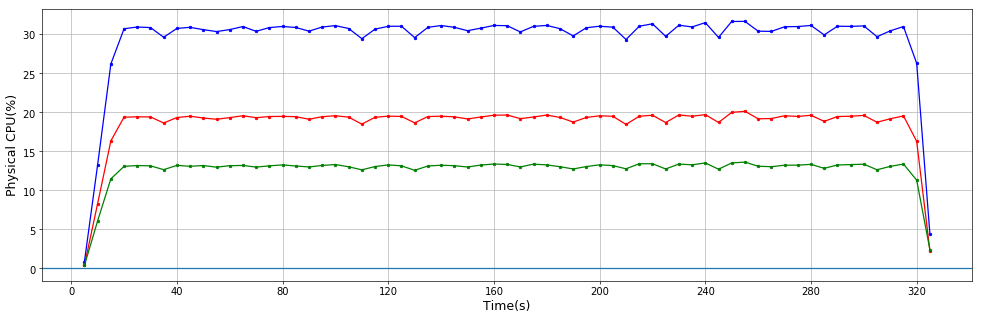

/root/mytesttools/tester/jupyter/reports/ab-DLS1-ab-180616-211946/ab-DLS1-esxtop-172.16.130.5.csv
| Red - CPU Total Util | Blue - CPU Total Core Util | Green - CPU Total Proc Time |


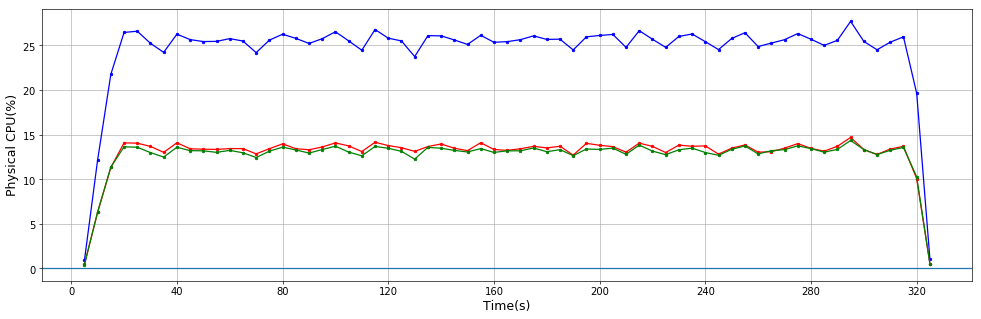

In [45]:
%run -i abench_cl.py -C DLS1-config -N ab-DLS1 -n 5000000 -c 10 